In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import csv
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'
sns.set()

### Load sunspot dataset

In [29]:
time_step = []
sunspots = []

with open('sunspots.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        sunspots.append(float(row[2]))
        time_step.append(int(row[0]))

series = np.array(sunspots)/400
time = np.array(time_step)

### Split into test and train time series

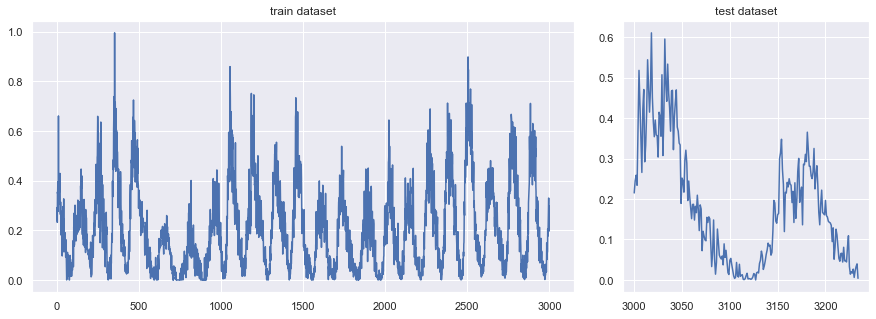

In [30]:
split_time = 3000
time_train = time[:split_time]
series_train = series[:split_time]
time_test= time[split_time:]
series_test = series[split_time:]
plt.figure(figsize=(15, 5))
plt.subplot2grid((1,3),(0,0),colspan=2)
plt.plot(time_train, series_train,'-')
plt.title('train dataset')
plt.subplot2grid((1,3),(0,2),colspan=1)
plt.plot(time_test, series_test,'-')
plt.title('test dataset')
plt.show()

### From time series to data for training the model 
A key question when using machine learning to process time series data is how to organize the data to feed in and train the model. We use sereval data points as features before the one data point used as labels.

In [39]:
def windowed_dataset(series, window_size):
    
    n = len(series)
    series_pad = np.pad(series,(window_size,0),'median')
    
    x = np.zeros((n,window_size))
    y = np.zeros((n,1))
    for i in range(n):
        k = i+window_size
        x[i,:] = series_pad[i:k]
        y[i,0] = series_pad[k]
    return x,y

window_size= 30
x_train,y_train = windowed_dataset(series_train, window_size)
x_test,y_test = windowed_dataset(series_test, window_size)

In [44]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=[window_size]), 
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.summary()
model.compile(loss='mae', optimizer='adam')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 841
Trainable params: 841
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.fit(x_train,y_train,batch_size=32,epochs=10)

Train on 3000 samples
Epoch 1/10
3000/3000 [==============================] - 1s 409us/sample - loss: 0.0762
Epoch 2/10
3000/3000 [==============================] - 0s 99us/sample - loss: 0.0583
Epoch 3/10
3000/3000 [==============================] - 0s 93us/sample - loss: 0.0522
Epoch 4/10
3000/3000 [==============================] - 0s 89us/sample - loss: 0.0498
Epoch 5/10
3000/3000 [==============================] - 0s 97us/sample - loss: 0.0486
Epoch 6/10
3000/3000 [==============================] - 0s 114us/sample - loss: 0.0485
Epoch 7/10
3000/3000 [==============================] - 0s 108us/sample - loss: 0.0470
Epoch 8/10
3000/3000 [==============================] - 0s 94us/sample - loss: 0.0470
Epoch 9/10
3000/3000 [==============================] - 0s 104us/sample - loss: 0.0458
Epoch 10/10
3000/3000 [==============================] - 0s 94us/sample - loss: 0.0463


In [46]:
series_train_predict=model.predict(x_train)
series_test_predict=model.predict(x_test)

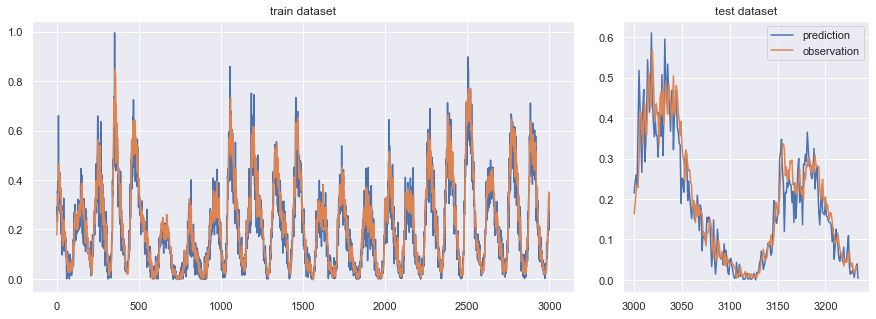

In [49]:
plt.figure(figsize=(15, 5))
plt.subplot2grid((1,3),(0,0),colspan=2)
plt.plot(time_train, series_train,'-')
plt.plot(time_train, series_train_predict,'-')
plt.title('train dataset')
plt.subplot2grid((1,3),(0,2),colspan=1)
plt.plot(time_test, series_test,'-')
plt.plot(time_test, series_test_predict,'-')
plt.title('test dataset')
plt.legend({'observation','prediction'})
plt.show()